In [335]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [336]:
dataset=pd.read_csv("bikes.csv")
dataset.head(5)

,base_price,kms_driven,age,power,brand,stroke,milage,length,weight,acceleration,rent
0,35000,17654,3,110,TVS,2.68,18.0,307.0,3504,12.0,1750.0
1,11990,11000,4,350,Royal Enfield,2.68,15.0,350.0,3693,11.5,599.5
2,600000,110,8,675,Triumph,3.47,18.0,318.0,3436,11.0,30000.0
3,65000,16329,4,180,TVS,3.40,16.0,304.0,3433,12.0,3250.0
4,80000,10000,3,150,Yamaha,3.40,17.0,302.0,3449,10.5,4000.0


In [337]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31840 entries, 0 to 31839
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   base_price    31840 non-null  int64  
 1   kms_driven    31840 non-null  int64  
 2   age           31840 non-null  int64  
 3   power         31840 non-null  int64  
 4   brand         31840 non-null  object 
 5   stroke        31840 non-null  float64
 6   milage        31840 non-null  float64
 7   length        31840 non-null  float64
 8   weight        31840 non-null  int64  
 9   acceleration  31840 non-null  float64
 10  rent          31840 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 2.7+ MB


# remove unwanted columns

In [338]:
dataset.drop("length",axis=1,inplace=True)
dataset.drop("weight",axis=1,inplace=True)
dataset.drop("acceleration",axis=1,inplace=True)
dataset.drop("rent",axis=1,inplace=True)


In [339]:
dataset

,base_price,kms_driven,age,power,brand,stroke,milage
0,35000,17654,3,110,TVS,2.68,18.0
1,11990,11000,4,350,Royal Enfield,2.68,15.0
2,600000,110,8,675,Triumph,3.47,18.0
3,65000,16329,4,180,TVS,3.40,16.0
4,80000,10000,3,150,Yamaha,3.40,17.0
...,...,...,...,...,...,...,...
31835,87000,16336,7,350,Royal Enfield,3.46,27.0
31836,70000,13858,11,350,Royal Enfield,3.90,44.0
31837,35000,11885,12,125,Suzuki,3.41,32.0
31838,196700,13216,4,390,KTM,3.41,28.0


In [340]:
dataset=dataset[["brand","kms_driven","power","stroke","milage","age","base_price"]]


In [341]:
# dataset.drop("brand",axis=1,inplace=True)



# outliers

C:\Users\Priyanka Negi\AppData\Local\Temp\ipykernel_21404\1072609985.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["kms_driven"])


<Axes: ylabel='kms_driven'>

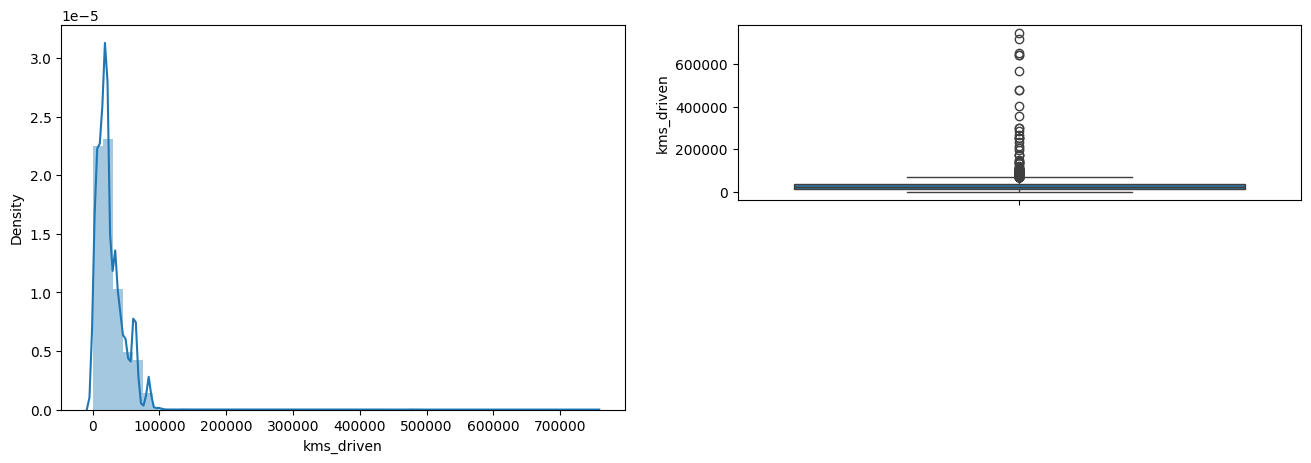

In [342]:

import matplotlib.pyplot as plt 
import seaborn as sns 


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset["kms_driven"])
plt.subplot(2,2,2)
sns.boxplot(dataset["kms_driven"])

In [343]:
#graph is right skewewd therefore used ----IQR
per25=dataset["kms_driven"].quantile(0.25)
per75=dataset["kms_driven"].quantile(0.45)
print(per25)
per75

12000.0


20000.0

In [344]:
iqr=per75-per25
upperlimit=per75+1.5*iqr
lowerlimit=per25-1.5*iqr

In [345]:
dataset=dataset.copy()
dataset["kms_driven"]=np.where(
    dataset["kms_driven"]>upperlimit,upperlimit,
    np.where(
        dataset["kms_driven"]<lowerlimit,lowerlimit,
        dataset["kms_driven"]
))

C:\Users\Priyanka Negi\AppData\Local\Temp\ipykernel_21404\16271884.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["kms_driven"])


<Axes: ylabel='kms_driven'>

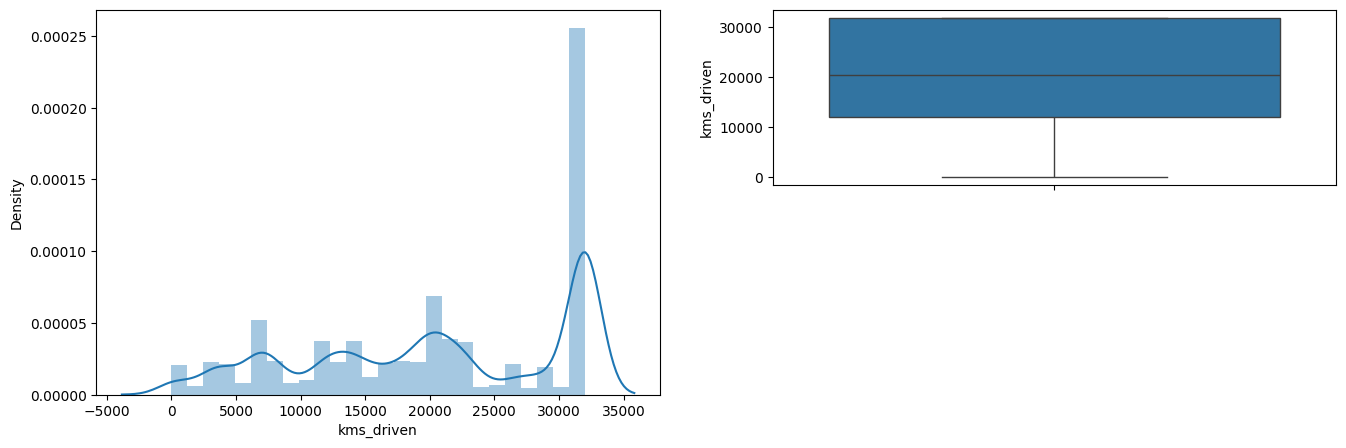

In [346]:
import matplotlib.pyplot as plt 
import seaborn as sns 


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset["kms_driven"])
plt.subplot(2,2,2)
sns.boxplot(dataset["kms_driven"])

<Axes: ylabel='base_price'>

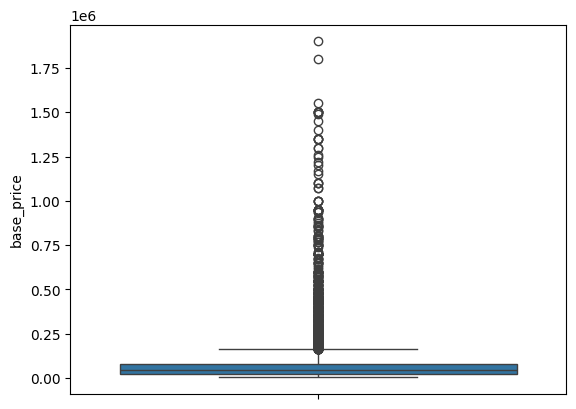

In [347]:
import seaborn as sns
sns.boxplot(dataset["base_price"])

In [348]:
#graph is right skewewd therefore used ----IQR
per25_2=dataset["base_price"].quantile(0.25)
per75_2=dataset["base_price"].quantile(0.45)
print(per25_2)
per75_2

25000.0


39000.0

In [349]:
iqr=per75_2-per25_2
upperlimit_2=per75_2+1.5*iqr
lowerlimit_2=per25_2-1.5*iqr

In [350]:
dataset=dataset.copy()
dataset["base_price"]=np.where(
    dataset["base_price"]>upperlimit_2,upperlimit_2,
    np.where(
        dataset["base_price"]<lowerlimit_2,lowerlimit_2,
        dataset["base_price"]
))

C:\Users\Priyanka Negi\AppData\Local\Temp\ipykernel_21404\3502934068.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["base_price"])


<Axes: ylabel='base_price'>

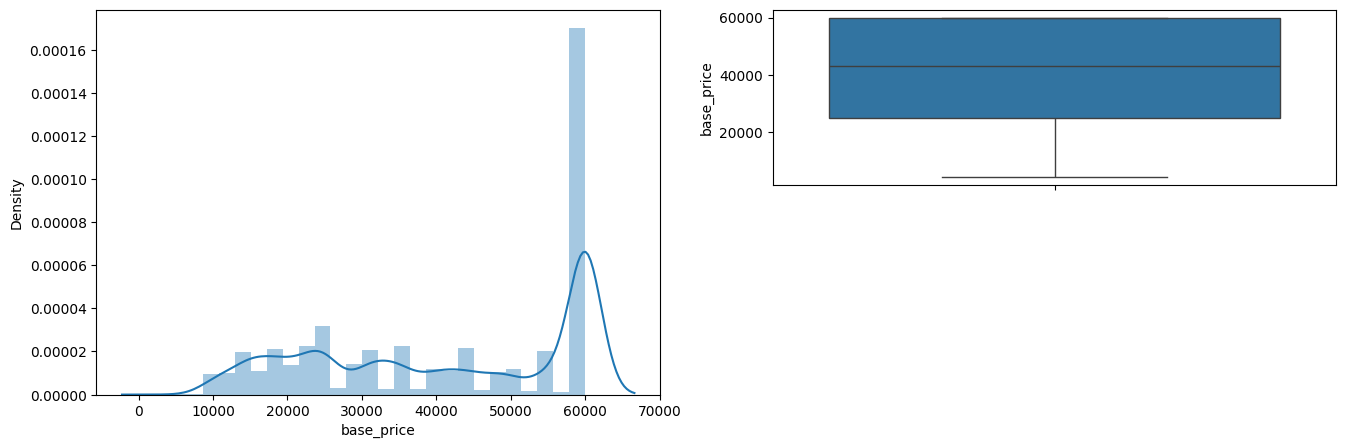

In [351]:
import matplotlib.pyplot as plt 
import seaborn as sns 


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset["base_price"])
plt.subplot(2,2,2)
sns.boxplot(dataset["base_price"])

In [352]:
dataset

,brand,kms_driven,power,stroke,milage,age,base_price
0,TVS,17654.0,110,2.68,18.0,3,35000.0
1,Royal Enfield,11000.0,350,2.68,15.0,4,11990.0
2,Triumph,110.0,675,3.47,18.0,8,60000.0
3,TVS,16329.0,180,3.40,16.0,4,60000.0
4,Yamaha,10000.0,150,3.40,17.0,3,60000.0
...,...,...,...,...,...,...,...
31835,Royal Enfield,16336.0,350,3.46,27.0,7,60000.0
31836,Royal Enfield,13858.0,350,3.90,44.0,11,60000.0
31837,Suzuki,11885.0,125,3.41,32.0,12,35000.0
31838,KTM,13216.0,390,3.41,28.0,4,60000.0


In [353]:
X=dataset.drop(columns=["base_price"])
y=dataset["base_price"]

In [354]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20, random_state=10)

In [355]:
Xtrain

,brand,kms_driven,power,stroke,milage,age
3413,Yamaha,32000.0,150,3.23,16.0,10
17685,Bajaj,8000.0,220,3.64,24.0,5
6635,Bajaj,32000.0,125,3.15,27.5,7
18544,Hero,32000.0,100,2.76,25.5,19
19520,Suzuki,22697.0,125,3.39,27.0,7
...,...,...,...,...,...,...
28017,Hero,3869.0,100,3.27,15.0,16
17728,Hero,22000.0,100,3.89,31.5,4
29199,Bajaj,8000.0,220,3.15,32.0,5
7293,KTM,8000.0,390,3.15,31.0,6


In [356]:
ytrain

3413     15500.0
17685    60000.0
6635     24000.0
18544    15000.0
19520    32000.0
          ...   
28017    18000.0
17728    39000.0
29199    60000.0
7293     60000.0
17673    60000.0
Name: base_price, Length: 25472, dtype: float64

# handling categorical column

In [357]:
Xtrain = pd.get_dummies(Xtrain,
                         columns = ["brand"],
                         drop_first = True)

In [358]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25472 entries, 3413 to 17673
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kms_driven             25472 non-null  float64
 1   power                  25472 non-null  int64  
 2   stroke                 25472 non-null  float64
 3   milage                 25472 non-null  float64
 4   age                    25472 non-null  int64  
 5   brand_Bajaj            25472 non-null  bool   
 6   brand_Benelli          25472 non-null  bool   
 7   brand_Ducati           25472 non-null  bool   
 8   brand_Harley-Davidson  25472 non-null  bool   
 9   brand_Hero             25472 non-null  bool   
 10  brand_Honda            25472 non-null  bool   
 11  brand_Hyosung          25472 non-null  bool   
 12  brand_Ideal            25472 non-null  bool   
 13  brand_Indian           25472 non-null  bool   
 14  brand_Jawa             25472 non-null  bool   
 15  bran

In [359]:
Xtest = pd.get_dummies(Xtest,
                         columns = ["brand"],
                         drop_first = True)

# this code ensures that both the training and test datasets have the same columns 

In [360]:
missing_cols = set(Xtrain.columns) - set(Xtest.columns)
for col in missing_cols:
    Xtest[col] = 0
Xtest = Xtest[Xtrain.columns]

In [361]:
standardScaler = StandardScaler()
standardScaler.fit(Xtrain)
X_train = standardScaler.transform(Xtrain)
X_test = standardScaler.transform(Xtest)

In [362]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [363]:
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

rf = RandomForestRegressor(random_state=10)
rf.fit(Xtrain,ytrain)

xgb = GradientBoostingRegressor(random_state=10)
xgb.fit(Xtrain,ytrain)

xg = XGBRegressor()
xg.fit(Xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [364]:
y_pred1 = lr.predict(Xtest)
y_pred2 = rf.predict(Xtest)
y_pred3 = xgb.predict(Xtest)
y_pred4 = xg.predict(Xtest)

In [365]:
from sklearn import metrics
score1 = metrics.r2_score(ytest,y_pred1)
score2 = metrics.r2_score(ytest,y_pred2)
score3 = metrics.r2_score(ytest,y_pred3)
score4 = metrics.r2_score(ytest,y_pred4)

In [366]:
print(score1,score2,score3,score4)

0.7698655791465716 0.9643964968247878 0.9590359736364823 0.9676851308086073


In [367]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [368]:
final_data

,Models,R2_SCORE
0,LR,0.769866
1,RF,0.964396
2,GBR,0.959036
3,XG,0.967685


<BarContainer object of 4 artists>

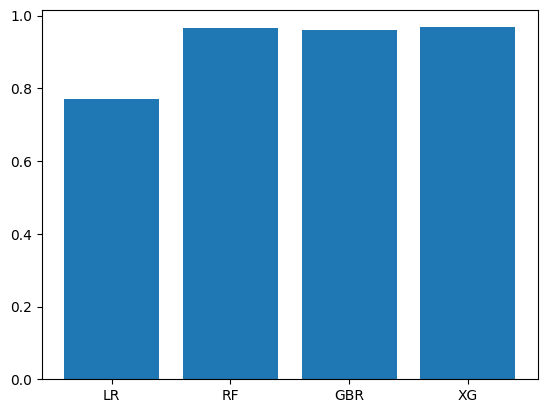

In [369]:
import matplotlib.pyplot as plt
plt.bar(final_data['Models'],final_data['R2_SCORE'])

In [370]:
xg = XGBRegressor()
xg_final = xg.fit(Xtrain,ytrain)

# #using random forest
# from sklearn.ensemble import RandomForestRegressor
# # Create the RandomForestRegressor object with default parameters or customize as needed
# rf = RandomForestRegressor()

# # Fit the model to the training data
# rf_final = rf.fit(Xtrain, ytrain)


In [371]:
import joblib
joblib.dump(xg_final,'bike_price_predictor')

['bike_price_predictor']

In [372]:
model = joblib.load('bike_price_predictor')

In [373]:
from xgboost import XGBRegressor

# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(Xtrain, ytrain)

# Save the model using XGBoost's own method
xgb_model.save_model('xgb_model_bike.json')  # JSON format, could also be a binary format with .bin

# To load the model later for prediction
loaded_xgb_model = XGBRegressor()
loaded_xgb_model.load_model('xgb_model_bike.json')

In [374]:
import pandas as pd


# list of brands 
all_brands = [
    'Bajaj', 'Benelli', 'Ducati', 'Harley-Davidson', 'Hero', 
    'Honda', 'Hyosung', 'Ideal', 'Indian', 'Jawa', 'KTM', 
    'Kawasaki', 'LML', 'MV', 'Mahindra', 'Rajdoot',
    'Royal Enfield', 'Suzuki', 'TVS', 'Triumph', 'Yamaha', 'Yezdi'  
]

# Creating the DataFrame with an example entry
data_new = pd.DataFrame({
    'brand': ['Hero'],
    'kms_driven': [2700000],
    'power': [120],
    'stroke': [5.2],
    'milage': [20.0],
    'age': [3],
}, index=[0])

# Perform one-hot encoding for the 'brand' column
data_new = pd.get_dummies(data_new, columns=['brand'])

# Ensure all expected brand columns are present, adding missing ones with zeros
for brand in all_brands:
    column_name = f'brand_{brand}'
    if column_name not in data_new.columns:
        data_new[column_name] = 0

# Ensure the column order matches the model's training data
expected_columns = ['kms_driven', 'power', 'stroke', 'milage', 'age'] + [f'brand_{brand}' for brand in all_brands]
data_new = data_new.reindex(columns=expected_columns)


# Now, data_new should be correctly structured for prediction with your model
prediction = model.predict(data_new)


In [375]:
prediction

array([46536.547], dtype=float32)

In [376]:
# from xgboost import XGBRegressor

# # Train the XGBoost model
# xgb_model = XGBRegressor()
# xgb_model.fit(Xtrain, ytrain)

# # Save the model using XGBoost's own method
# xgb_model.save_model('xgb_model_bike.json')  # JSON format, could also be a binary format with .bin

# # To load the model later for prediction
# loaded_xgb_model = XGBRegressor()
# loaded_xgb_model.load_model('xgb_model_bike.json')

